# Shap explainers and gradient-boosting trees

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import shap

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
from sklearn import tree

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules

In [21]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop 'deck' and 'embark_town' columns as they have many missing values
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive', 'class'], inplace=True)

/var/folders/0w/2wvbn9xx39scmwd7157fzlw80000gn/T/ipykernel_9897/54306817.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [22]:
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])  # Male: 1, Female: 0
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

In [23]:
# Define features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (712, 6), Test set shape: (179, 6)


In [30]:
%%time
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini',
                                       max_depth=3)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

CPU times: user 9.51 ms, sys: 730 μs, total: 10.2 ms
Wall time: 11.3 ms


In [31]:
feature_names = X.columns

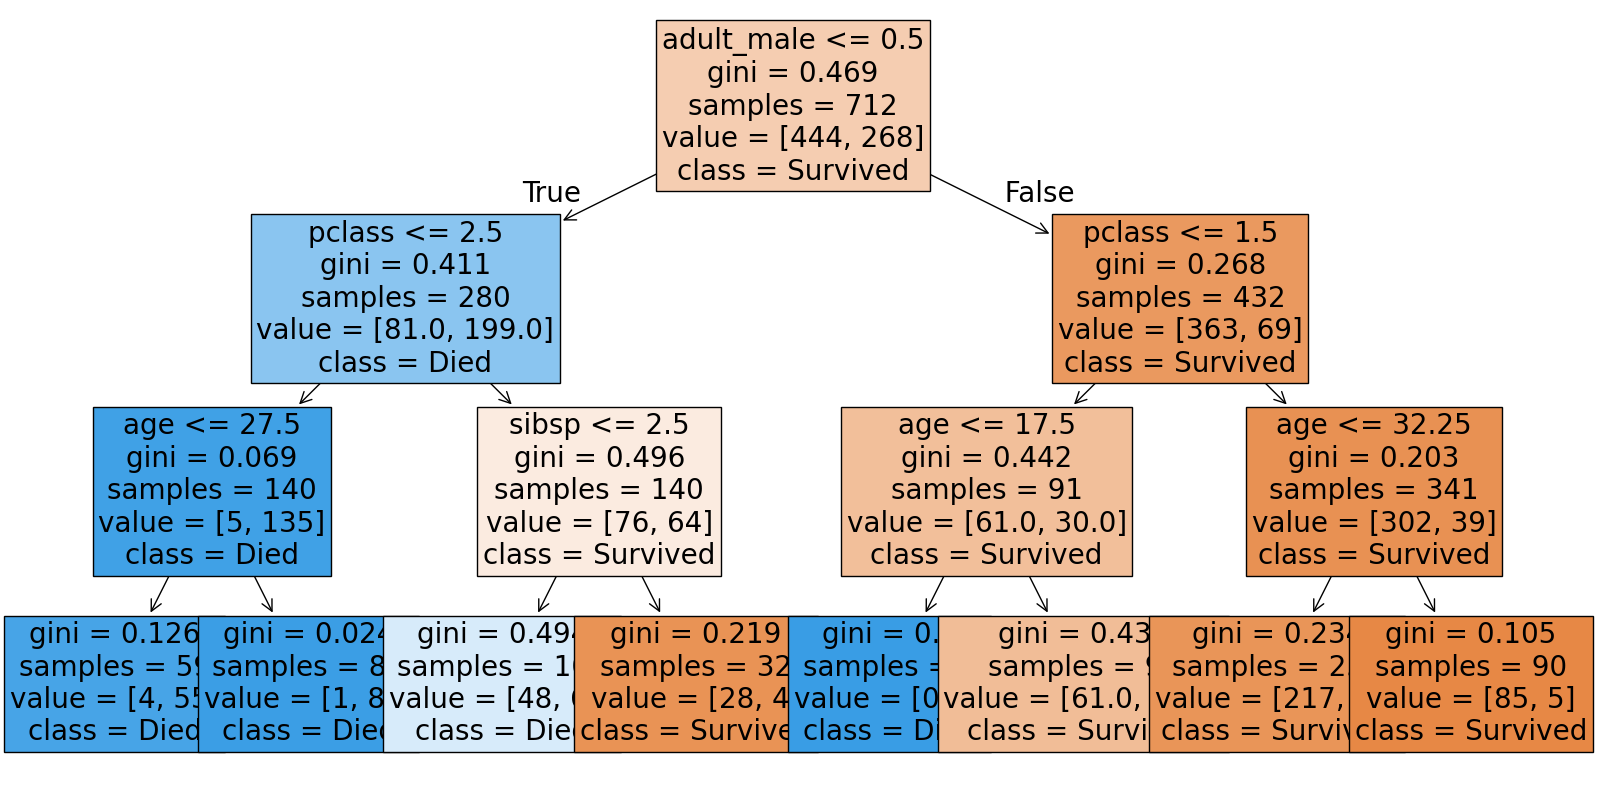

In [32]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=feature_names,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

# Numerical Example

In [33]:
df = pd.read_csv("Data/train.csv")
df1 = numerical_df = df.select_dtypes(include=['number'])

In [35]:
X = df1[df1.columns[:-1]]
y = df1.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=10000, learning_rate=0.005,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True)

# Make predictions
y_pred = catboost_model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Shap analysis

In [38]:
# Explain predictions with SHAP
explainer = shap.Explainer(catboost_model, X_train)
shap_values = explainer(X_test)

100%|===================| 291/292 [01:52<00:00]        

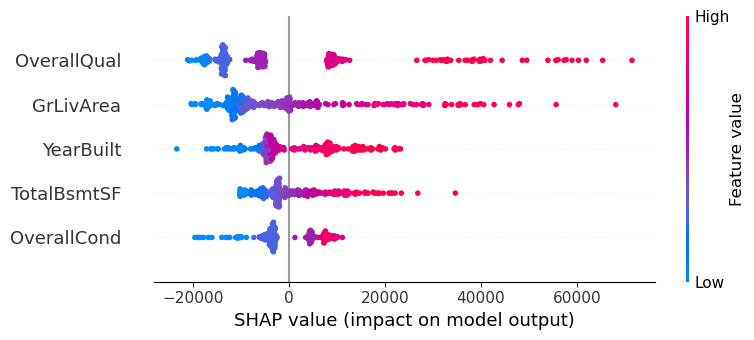

In [39]:
# Summary plot
shap.summary_plot(shap_values, X_test, max_display=5)

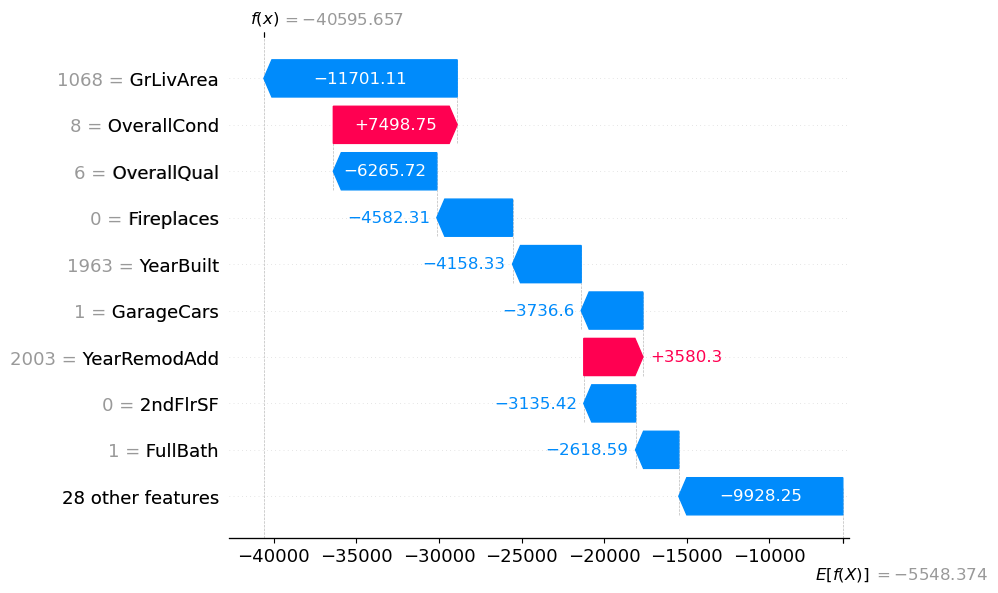

In [41]:
# Waterfall plot for a single observation
shap.plots.waterfall(shap_values[0])

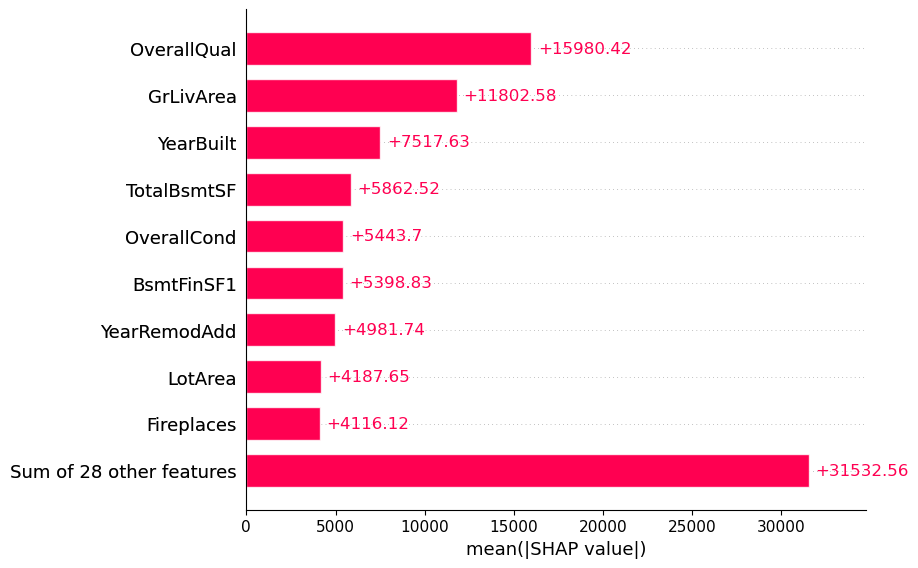

In [40]:
shap.plots.bar(shap_values)

More plots available: https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html

## Your turn

First, plot the correlation of the outputs with the actual home sale prices.

array([[1.        , 0.95852536],
       [0.95852536, 1.        ]])

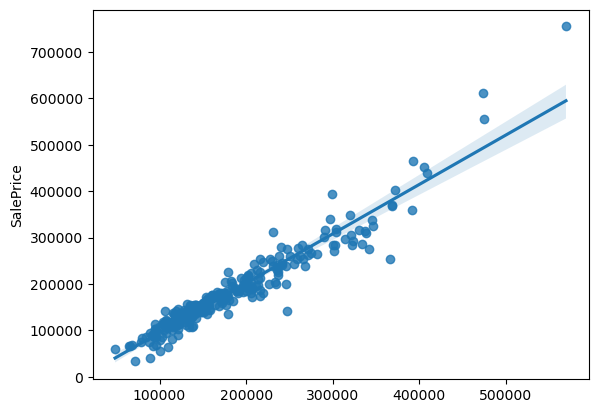

In [64]:
import seaborn as sns

sns.regplot(x = y_pred, y = y_test)

np.corrcoef(y_pred, y_test)

## Next, add in the categorical variables then train a new CatBoost model. Run this through SHAP
What do you observe? What are the top variables now?

In [65]:
df = pd.read_csv("Data/train.csv")
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['number'])

categorical_features = list(categorical_df.columns)

categorical_df.fillna("NA", inplace = True)

df = pd.concat([categorical_df, numerical_df], axis = 1)
X = df[df.columns[:-1]]
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True, 
                  cat_features = categorical_features)

# Make predictions
y_pred = catboost_model.predict(X_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
X.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRms

In [59]:
numerical_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [67]:
# Explain predictions with SHAP
explainer = shap.TreeExplainer(catboost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, max_display=10)

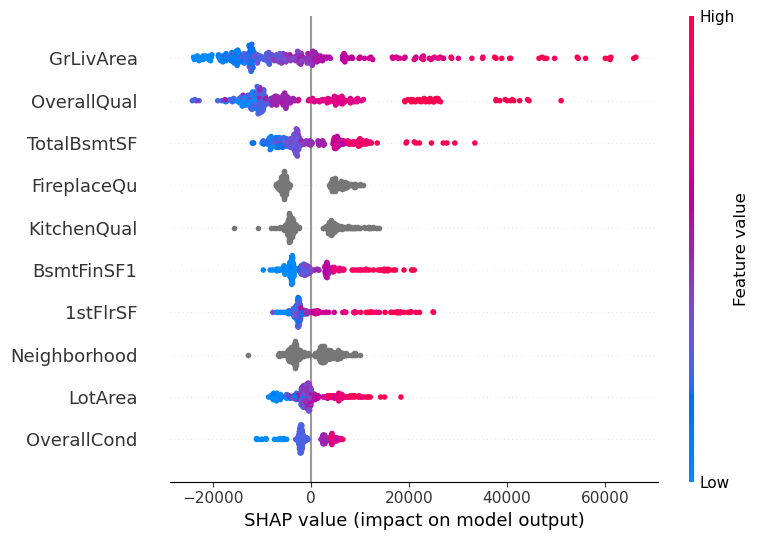